## Projekt

#### Imports

In [56]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as ss

#### Read data

In [57]:
data = pd.read_csv('parkinsons_disease_data.csv')

data.head()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,FunctionalAssessment,Tremor,Rigidity,Bradykinesia,PosturalInstability,SpeechProblems,SleepDisorders,Constipation,Diagnosis,DoctorInCharge
0,3058,85,0,3,1,19.619878,0,5.108241,1.380660,3.893969,...,1.572427,1,0,0,0,0,0,0,0,DrXXXConfid
1,3059,75,0,0,2,16.247339,1,6.027648,8.409804,8.513428,...,4.787551,0,1,0,1,0,1,0,1,DrXXXConfid
2,3060,70,1,0,0,15.368239,0,2.242135,0.213275,6.498805,...,2.130686,1,0,0,0,1,0,1,1,DrXXXConfid
3,3061,52,0,0,0,15.454557,0,5.997788,1.375045,6.715033,...,3.391288,1,1,1,0,0,0,1,1,DrXXXConfid
4,3062,87,0,0,1,18.616042,0,9.775243,1.188607,4.657572,...,3.200969,0,0,0,1,0,1,0,0,DrXXXConfid


#### Clean data

In [58]:
data = data.drop("DoctorInCharge", axis=1)
data = data.drop("PatientID", axis=1)
data = data.drop("UPDRS", axis=1)

#### Visualize data

In [59]:
data_vis = data.copy()
data_vis['Gender'] = data_vis['Gender'].map({0: 'Male', 1: 'Female'})
data_vis['Ethnicity'] = data_vis['Ethnicity'].map({0: 'Caucasian', 1: 'African American', 2: 'Asian', 3: 'Other'})
data_vis['EducationLevel'] = data_vis['EducationLevel'].map({0: 'None', 1: 'High School', 2: 'Bachelor\'s', 3: 'Higher'})
data_vis['Smoking'] = data_vis['Smoking'].map({0: 'No', 1: 'Yes'})
data_vis['FamilyHistoryParkinsons'] = data_vis['FamilyHistoryParkinsons'].map({0: 'No', 1: 'Yes'})
data_vis['TraumaticBrainInjury'] = data_vis['TraumaticBrainInjury'].map({0: 'No', 1: 'Yes'})
data_vis['Hypertension'] = data_vis['Hypertension'].map({0: 'No', 1: 'Yes'})
data_vis['Diabetes'] = data_vis['Diabetes'].map({0: 'No', 1: 'Yes'})
data_vis['Depression'] = data_vis['Depression'].map({0: 'No', 1: 'Yes'})
data_vis['Stroke'] = data_vis['Stroke'].map({0: 'No', 1: 'Yes'})
data_vis['Tremor'] = data_vis['Tremor'].map({0: 'No', 1: 'Yes'})
data_vis['Rigidity'] = data_vis['Rigidity'].map({0: 'No', 1: 'Yes'})
data_vis['Bradykinesia'] = data_vis['Bradykinesia'].map({0: 'No', 1: 'Yes'})
data_vis['PosturalInstability'] = data_vis['PosturalInstability'].map({0: 'No', 1: 'Yes'})
data_vis['SpeechProblems'] = data_vis['SpeechProblems'].map({0: 'No', 1: 'Yes'})
data_vis['SleepDisorders'] = data_vis['SleepDisorders'].map({0: 'No', 1: 'Yes'})
data_vis['Constipation'] = data_vis['Constipation'].map({0: 'No', 1: 'Yes'})

In [60]:
sns.set(style="whitegrid")

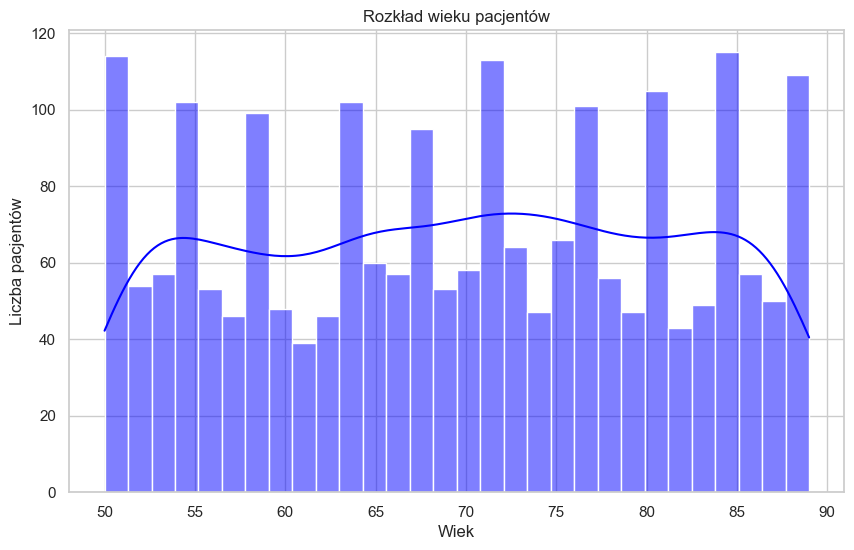

In [61]:
# Histogram wieku
plt.figure(figsize=(10, 6))
sns.histplot(data_vis['Age'], bins=30, kde=True, color='blue')
plt.title('Rozkład wieku pacjentów')
plt.xlabel('Wiek')
plt.ylabel('Liczba pacjentów')
plt.show()

C:\Users\macie\AppData\Local\Temp\ipykernel_27172\2408549216.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Ethnicity', data=data_vis, palette='Set2')


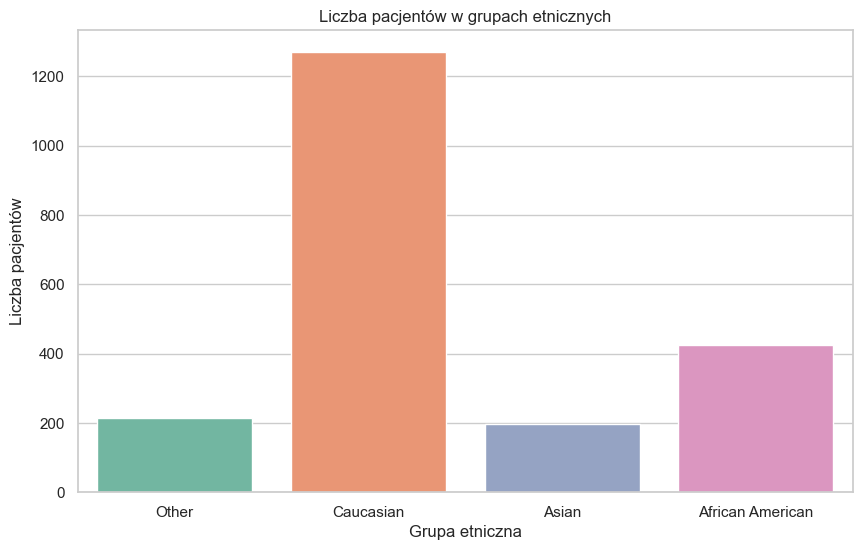

In [62]:
# Wykres słupkowy dla grup etnicznych
plt.figure(figsize=(10, 6))
sns.countplot(x='Ethnicity', data=data_vis, palette='Set2')
plt.title('Liczba pacjentów w grupach etnicznych')
plt.xlabel('Grupa etniczna')
plt.ylabel('Liczba pacjentów')
plt.show()


C:\Users\macie\AppData\Local\Temp\ipykernel_27172\1021731583.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Smoking', data=data_vis, palette='Set1')


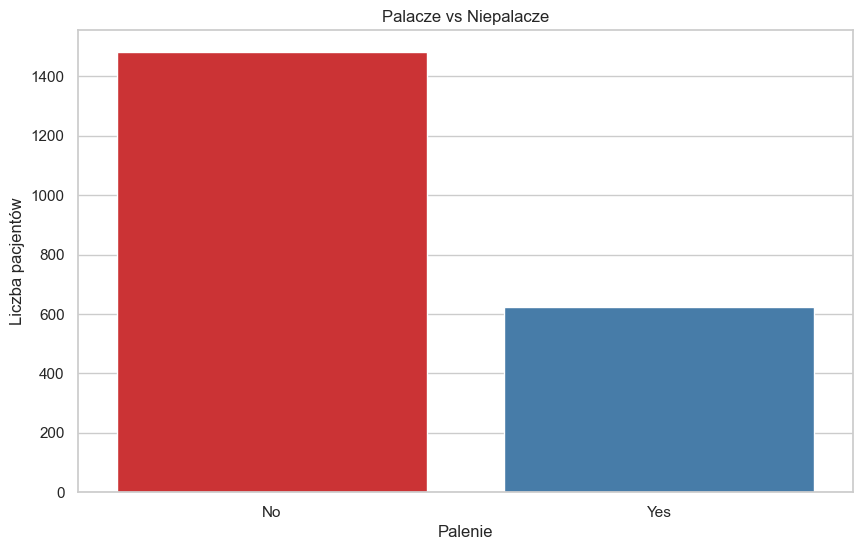

In [63]:
# Wykres słupkowy palaczy vs niepalaczy
plt.figure(figsize=(10, 6))
sns.countplot(x='Smoking', data=data_vis, palette='Set1')
plt.title('Palacze vs Niepalacze')
plt.xlabel('Palenie')
plt.ylabel('Liczba pacjentów')
plt.show()

C:\Users\macie\AppData\Local\Temp\ipykernel_27172\2566130723.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=data_vis, palette='Set3')


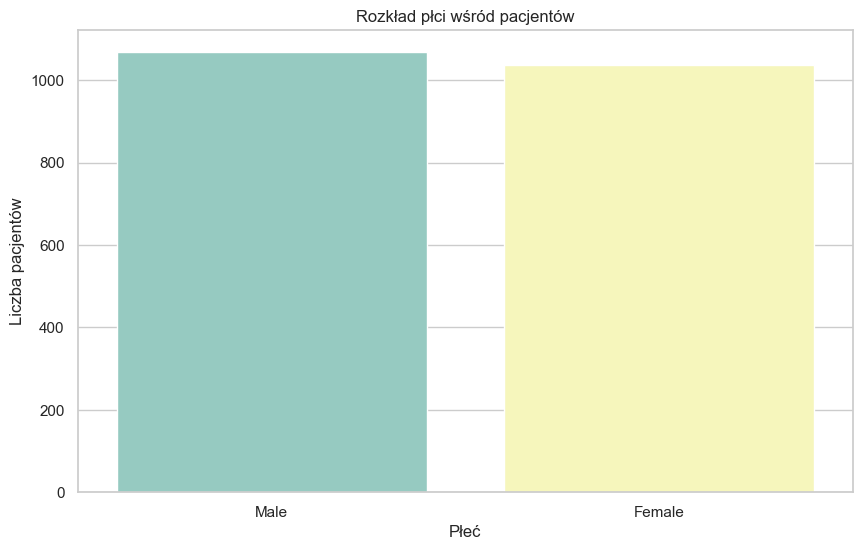

In [64]:
# Wykres słupkowy podziału płci
plt.figure(figsize=(10, 6))
sns.countplot(x='Gender', data=data_vis, palette='Set3')
plt.title('Rozkład płci wśród pacjentów')
plt.xlabel('Płeć')
plt.ylabel('Liczba pacjentów')
plt.show()

#### Analiza czynników predysponujących do choroby Parkinsona

#### Helper

In [65]:
# Funkcja do obliczania korelacji Craméra dla zmiennych kategorycznych
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    return (chi2 / (n * (min(confusion_matrix.shape) - 1))) ** 0.5

#### Płeć

Korelacja między płcią a diagnozą choroby Parkinsona: 0.016835128797290284


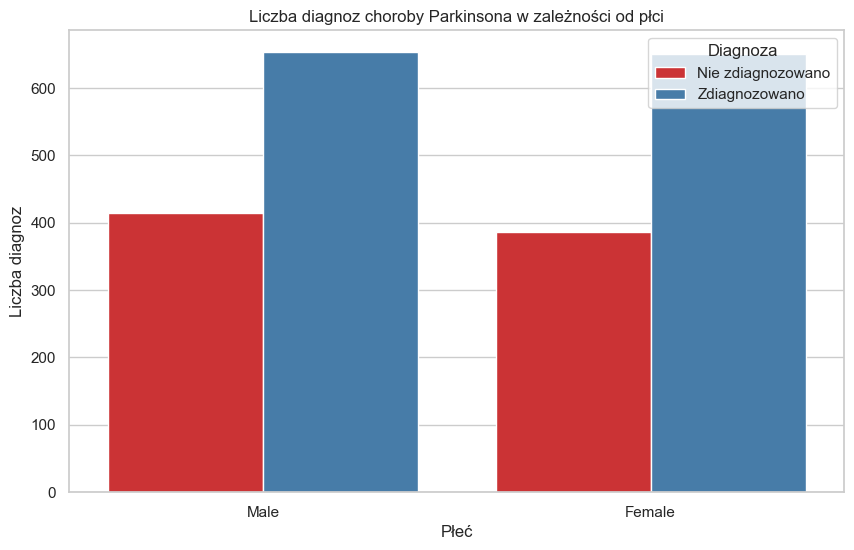

In [77]:
gender_correlation = data['Gender'].corr(data['Diagnosis'], method='pearson')
print("Korelacja między płcią a diagnozą choroby Parkinsona:", gender_correlation)

gender_data = data.copy()

gender_data['Gender'] = data['Gender'].map({0: 'Male', 1: 'Female'})

plt.figure(figsize=(10, 6))
sns.countplot(x='Gender', hue='Diagnosis', data=gender_data, palette='Set1')
plt.title('Liczba diagnoz choroby Parkinsona w zależności od płci')
plt.xlabel('Płeć')
plt.ylabel('Liczba diagnoz')
plt.legend(title='Diagnoza', labels=['Nie zdiagnozowano', 'Zdiagnozowano'])
plt.show()

##### Wiek

Korelacja między wiekiem a diagnozą choroby Parkinsona: 0.06534391257730043


C:\Users\macie\AppData\Local\Temp\ipykernel_27172\2406821728.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_summary = temp_data.groupby('AgeGroup')['Diagnosis'].value_counts().unstack(fill_value=0)


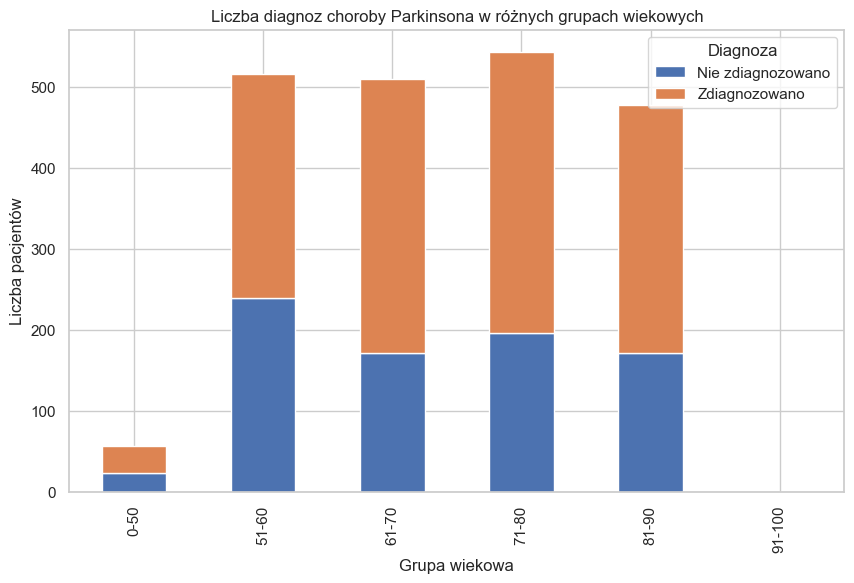

In [66]:
age_correlation = data['Age'].corr(data['Diagnosis'], method='pearson')
print("Korelacja między wiekiem a diagnozą choroby Parkinsona:", age_correlation)

temp_data = data.copy()
temp_data['AgeGroup'] = pd.cut(temp_data['Age'], bins=[0, 50, 60, 70, 80, 90, 100], labels=['0-50', '51-60', '61-70', '71-80', '81-90', '91-100'])

age_group_summary = temp_data.groupby('AgeGroup')['Diagnosis'].value_counts().unstack(fill_value=0)

# Wykres słupkowy dla grup wiekowych z liczbą diagnoz
age_group_summary.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Liczba diagnoz choroby Parkinsona w różnych grupach wiekowych')
plt.xlabel('Grupa wiekowa')
plt.ylabel('Liczba pacjentów')
plt.legend(title='Diagnoza', labels=['Nie zdiagnozowano', 'Zdiagnozowano'])
plt.show()

##### Tryb życia

Korelacja Craméra dla palenia i diagnozy Parkinsona: 0.004169539393301095


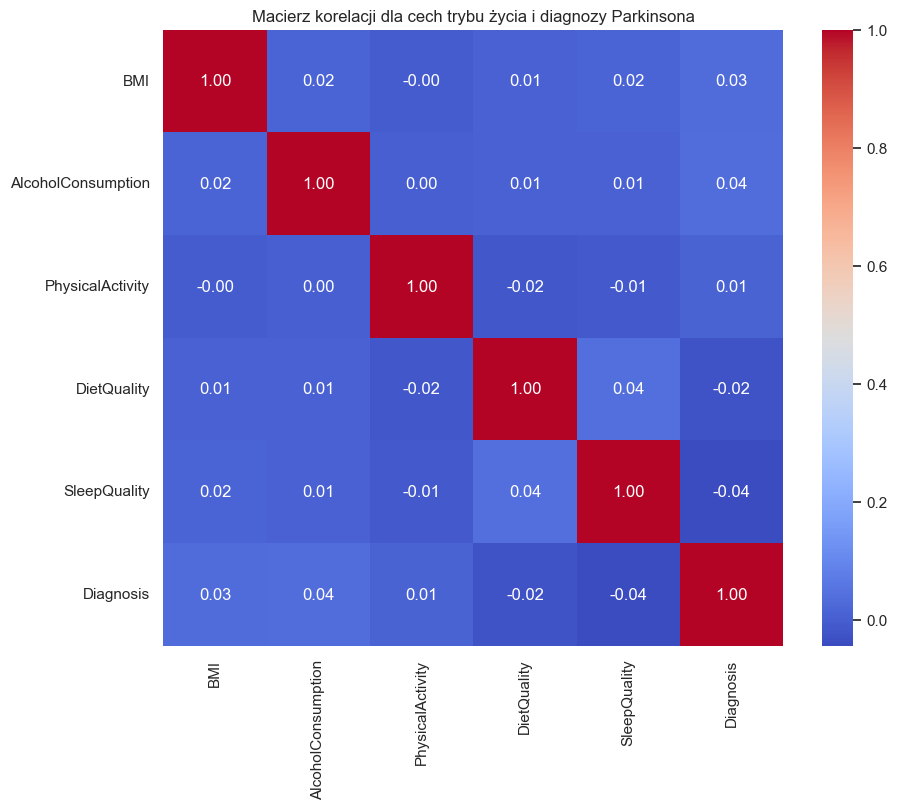

In [67]:
# Analiza korelacji dla zmiennych kategorycznych
cramer_corr = cramers_v(data['Smoking'], data['Diagnosis'])
print("Korelacja Craméra dla palenia i diagnozy Parkinsona:", cramer_corr)

# Obliczanie korelacji Pearsona dla zmiennych ciągłych
continuous_vars = ['BMI', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality', 'SleepQuality']
correlation_matrix = data[continuous_vars + ['Diagnosis']].corr(method='pearson')

# Wizualizacja korelacji za pomocą heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Macierz korelacji dla cech trybu życia i diagnozy Parkinsona')
plt.show()

##### Czynniki genetyczne

C:\Users\macie\AppData\Local\Temp\ipykernel_27172\2197857345.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Cramer\'s V', y='Health Factor', data=cramer_df, palette='viridis')


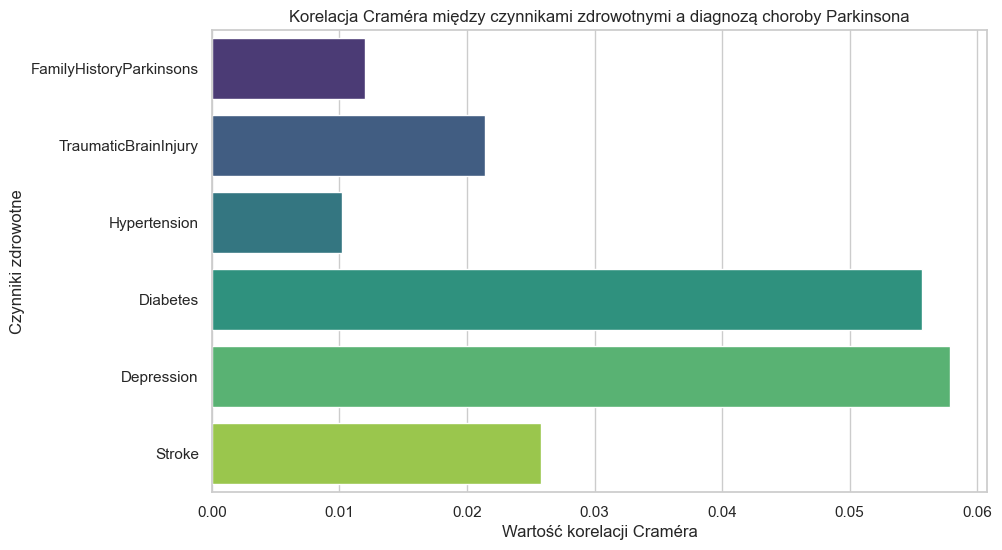

In [68]:
health_factors = ['FamilyHistoryParkinsons', 'TraumaticBrainInjury', 'Hypertension', 'Diabetes', 'Depression', 'Stroke']

# Wyniki korelacji Craméra
cramer_results = []
for factor in health_factors:
    cramer_corr = cramers_v(data[factor], data['Diagnosis'])
    cramer_results.append((factor, cramer_corr))

# Przygotowanie DataFrame do wizualizacji
cramer_df = pd.DataFrame(cramer_results, columns=['Health Factor', 'Cramer\'s V'])

# Tworzenie wykresu słupkowego
plt.figure(figsize=(10, 6))
sns.barplot(x='Cramer\'s V', y='Health Factor', data=cramer_df, palette='viridis')
plt.title('Korelacja Craméra między czynnikami zdrowotnymi a diagnozą choroby Parkinsona')
plt.xlabel('Wartość korelacji Craméra')
plt.ylabel('Czynniki zdrowotne')
plt.show()

#### Model ML

In [89]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

class DetailedModel:
    def __init__(self, data, random_state=42):
        self.data = data.copy()
        self.random_state = random_state
        self.model = None

    def load_data(self):
        self.features = self.data.drop(columns=['Diagnosis'])
        self.targets = self.data['Diagnosis']

    def split_data(self, test_size=0.3):
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(
            self.features, self.targets, test_size=test_size, random_state=self.random_state
        )

    def train_model(self, n_estimators=100):
        self.model = RandomForestClassifier(n_estimators=n_estimators, random_state=self.random_state)
        self.model.fit(self.X_train, self.y_train)

    def predict(self):
        self.predictions = self.model.predict(self.X_test)
        return self.predictions

    def evaluate_model(self):
        self.accuracy = accuracy_score(self.y_test, self.predictions)
        return self.accuracy

    def feature_importance(self):
        self.importances = pd.Series(self.model.feature_importances_, index=self.features.columns)
        return self.importances.sort_values(ascending=False)

    def run_all(self):
        self.load_data()
        self.split_data()
        self.train_model()
        self.predict()
        self.evaluate_model()
        return {
            "Accuracy": self.accuracy,
            "Feature Importances": self.feature_importance()
        }

# Example usage:
detailed_model = DetailedModel(data)
detailed_results = detailed_model.run_all()
print("Model Accuracy:", detailed_results['Accuracy'])
print("Feature Importances:\n", detailed_results['Feature Importances'])


Model Accuracy: 0.7658227848101266
Feature Importances:
 FunctionalAssessment        0.107989
MoCA                        0.090289
Tremor                      0.071514
DietQuality                 0.050201
CholesterolLDL              0.048833
CholesterolTotal            0.047592
AlcoholConsumption          0.046996
CholesterolTriglycerides    0.046229
BMI                         0.045888
SleepQuality                0.044136
PhysicalActivity            0.043773
CholesterolHDL              0.042033
DiastolicBP                 0.041665
Age                         0.041330
SystolicBP                  0.040972
Rigidity                    0.040029
Bradykinesia                0.033033
PosturalInstability         0.019683
EducationLevel              0.016073
Ethnicity                   0.013746
Depression                  0.008845
Gender                      0.008140
Constipation                0.007677
SpeechProblems              0.006990
Smoking                     0.006954
SleepDisorders    

#### Uproszczony model

In [125]:
features = data[['Age', 'Gender', 'Ethnicity','BMI', 'AlcoholConsumption']]
targets = data['Diagnosis']

# Podział danych na zbiór uczący i testowy
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.3, random_state=42)

# Budowa i trening modelu Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

def predict_parkinson_probability(age, gender, ethnicity, bmi, alc_consumption):
    # Przekształcenie danych wejściowych do formatu zrozumiałego dla modelu
    input_data = pd.DataFrame({
        'Age': [age],
        'Gender': [gender],
        'Ethnicity': [ethnicity],
        'BMI': [bmi],
        'AlcoholConsumption': [alc_consumption]
    })
    
    # Użycie modelu do przewidywania prawdopodobieństwa
    probabilities = model.predict_proba(input_data)
    
    # Zwrócenie prawdopodobieństwa diagnozy choroby Parkinsona
    return probabilities[0][1]

# Przykładowe użycie funkcji
probability = predict_parkinson_probability(21, 0, 0, 39.0, 0)
print(f"Prawdopodobieństwo diagnozy choroby Parkinsona: {probability:.2%}")

Prawdopodobieństwo diagnozy choroby Parkinsona: 57.00%
